# Experiment_ Prediction of Pokemon Combat outcomes
This example is in the brilliant book _"輕鬆學會Google TensorFlow 2.0人工智慧深度學習實作開發（第二版）"_

The data used in this example can be downloaded from my data_repository

<center><img src="https://cdn.kingstone.com.tw/book/images/product/20131/2013120534810/2013120534810b.jpg" width="25%" height="25%" />輕鬆學會Google TensorFlow 2.0人工智慧深度學習實作開發（第二版）</center>

In [1]:
import os 
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pylab as plt
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
pokemon_df = pd.read_csv('./pokemon.csv')
pokemon_df.head(5)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [3]:
pokemon_df.set_index('#', inplace=True)
pokemon_df

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True


In [4]:
combat_df = pd.read_csv('./combats.csv')
combat_df.head(5)

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


## Load the NA values and re-fill 

In [5]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 800
Data columns (total 11 columns):
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(7), object(3)
memory usage: 69.5+ KB


In [6]:
pokemon_df['Type 2'].value_counts(dropna = False)   

NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Rock         14
Ghost        14
Ice          14
Water        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [7]:
pokemon_df['Type 2'].fillna('empty', inplace=True)
pokemon_df['Type 2'].value_counts(dropna = False)  

empty       386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Rock         14
Ghost        14
Ice          14
Water        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

## Data preprocess

In [8]:
print(combat_df.dtypes)
print('-'*30)
print(pokemon_df.dtypes)

First_pokemon     int64
Second_pokemon    int64
Winner            int64
dtype: object
------------------------------
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object


#### Transfering the data into certain type which is more easier to be manipulated 

In [9]:
pokemon_df['Type 1'] = pokemon_df['Type 1'].astype('category') #Transfer the origin type 'object' to 'category'
pokemon_df['Type 2'] = pokemon_df['Type 2'].astype('category') #type 'category' has many useful sub-functions
pokemon_df['Legendary'] = pokemon_df['Legendary'].astype('int')
pokemon_df.dtypes

Name            object
Type 1        category
Type 2        category
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed            int64
Generation       int64
Legendary        int64
dtype: object

## one-hot encoding
Function ***pandas.get_dummies()*** is used to encode 'category' varibles into one-hot encoding format.

In [10]:
df_type1_one_hot = pd.get_dummies(pokemon_df['Type 1'])
df_type1_one_hot.head(5)

Type 1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
#,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [11]:
df_type2_one_hot = pd.get_dummies(pokemon_df['Type 2'])
df_type2_one_hot.head(5)

Type 2,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Then combine 'Type 1' and 'Type 2' as one dataframe.

In [12]:
combine_df_one_hot = df_type1_one_hot.add(df_type2_one_hot, fill_value=0).astype('int64')
pd.options.display.max_columns = 30
pokemon_df = pokemon_df.join(combine_df_one_hot)
pokemon_df.head(5)

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,Charmander,Fire,empty,39,52,43,60,50,65,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


Inquire the labels of categories by **cat.categories**

In [13]:
dict(enumerate(pokemon_df['Type 2'].cat.categories))

{0: 'Bug',
 1: 'Dark',
 2: 'Dragon',
 3: 'Electric',
 4: 'Fairy',
 5: 'Fighting',
 6: 'Fire',
 7: 'Flying',
 8: 'Ghost',
 9: 'Grass',
 10: 'Ground',
 11: 'Ice',
 12: 'Normal',
 13: 'Poison',
 14: 'Psychic',
 15: 'Rock',
 16: 'Steel',
 17: 'Water',
 18: 'empty'}

In [14]:
pokemon_df['Type 2'].cat.codes.head(10)

#
1     13
2     13
3     13
4     13
5     18
6     18
7      7
8      2
9      7
10    18
dtype: int8

In [15]:
pokemon_df['Type 1'] = pokemon_df['Type 1'].cat.codes
pokemon_df['Type 2'] = pokemon_df['Type 2'].cat.codes
pokemon_df.drop('Name', axis=1, inplace=True)
pokemon_df.head(5)

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,9,13,45,49,49,65,65,45,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,9,13,60,62,63,80,80,60,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,9,13,80,82,83,100,100,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,9,13,80,100,123,122,120,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,6,18,39,52,43,60,50,65,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


The first argument in `.apply()` is a customized fuction. `'axis'` set as 'column' will process the data with the funcion row by row. 

**Signature:**                  

        df.apply(
            func,
            axis=0,
            broadcast=None,
            raw=False,
            reduce=None,
            result_type=None,
            args=(),
            **kwds,
        )

Docstring:
Apply a function along an axis of the DataFrame.

Objects passed to the function are Series objects whose index is
either the DataFrame's index (``axis=0``) or the DataFrame's columns
(``axis=1``). By default (``result_type=None``), the final return type
is inferred from the return type of the applied function. Otherwise,
it depends on the `result_type` argument.

In [19]:
combat_df['Winner'] = combat_df.apply(lambda x: 0
                                     if x.Winner == x.First_pokemon
                                     else 1,
                                     axis = 1)
combat_df.head(5)

,First_pokemon,Second_pokemon,Winner
0,266,298,1
1,702,701,1
2,191,668,1
3,237,683,1
4,151,231,0


## Separate the original data into 3 sets: Training, Validation, Testing
step follows:
1. generate a random num index with the same size as the aiming data.
2. separate the indexes as Train, Validation and Testing with ratio 6:2:2. 

In [20]:
data_num = combat_df.shape[0]  #axis set as row 
indexes = np.random.permutation(data_num)
tr_indexes = indexes[:int(data_num*.6)]
val_indexes = indexes[int(data_num*.6):int(data_num*.8)]
ts_indexes = indexes[int(data_num*.8):]
tr_data = combat_df.loc[tr_indexes]
val_data = combat_df.loc[val_indexes]
ts_data = combat_df.loc[ts_indexes]

## Normalization

In [21]:
pokemon_df['Type 1'] = pokemon_df['Type 1']/19  #dividen by 19 which is the number of attribute.
pokemon_df['Type 2'] = pokemon_df['Type 2']/19

In [34]:
mean_pk = pokemon_df.loc[:, 'HP':'Generation'].mean()
std_pk = pokemon_df.loc[:, 'HP':'Generation'].std()
pokemon_df.loc[:,'HP':'Generation'] = (pokemon_df.loc[:,'HP':'Generation']-mean_pk)/std_pk
pokemon_df

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.473684,0.684211,-0.950032,-0.924328,-0.796655,-0.238981,-0.248033,-0.801002,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0.473684,0.684211,-0.362595,-0.523803,-0.347700,0.219422,0.290974,-0.284837,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0.473684,0.684211,0.420654,0.092390,0.293665,0.830626,1.009651,0.403383,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0.473684,0.684211,0.420654,0.646964,1.576395,1.502951,1.728328,0.403383,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,0.315789,0.947368,-1.185007,-0.831899,-0.989065,-0.391782,-0.787041,-0.112782,-1.398762,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.789474,0.210526,-0.754220,0.646964,2.442237,0.830626,2.806344,-0.628947,1.610947,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
797,0.789474,0.210526,-0.754220,2.495543,1.159507,2.664239,1.368990,1.435713,1.610947,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
798,0.736842,0.421053,0.420654,0.955061,-0.443905,2.358637,2.087667,0.059273,1.610947,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


## Build the training data of Numpy array

In [26]:
xtr_index= np.array(tr_data.drop('Winner', axis=1))
xval_index = np.array(val_data.drop('Winner', axis=1))
xts_index = np.array(ts_data.drop('Winner', axis=1))
print(xtr_index)                  

[[592 374]
 [307 320]
 [591 488]
 ...
 [244 409]
 [460   7]
 [312 723]]


In [27]:
ytr = np.array(tr_data['Winner'])
yval = np.array(val_data['Winner'])
yts = np.array(ts_data['Winner'])
yts

array([0, 1, 1, ..., 0, 1, 1])

In [40]:
#get the normal data
pokemon_data_normal = np.array(pokemon_df.loc[:, :'Legendary'])
print(pokemon_data_normal[1].shape)

xtr_normal = pokemon_data_normal[xtr_index-1].reshape((-1,20))
xval_normal = pokemon_data_normal[xval_index-1].reshape((-1,20))
xts_normal = pokemon_data_normal[xts_index-1].reshape((-1,20))
xts_normal[1]

(10,)


array([ 0.42105263,  0.94736842, -1.92909295, -1.20161476,  0.5181426 ,
       -1.30858795,  0.65031279, -1.48922211, -0.19487863,  0.        ,
        0.68421053,  0.36842105,  0.22484137,  0.03077114, -0.12322221,
       -0.2389808 ,  0.11130509,  0.74749298, -1.39876207,  0.        ])

In [41]:
pokemon_data_one_hot = np.array(pokemon_df.loc[:,'HP':])
print(pokemon_data_one_hot[1].shape)
xtr_one_hot = pokemon_data_one_hot[xtr_index-1].reshape((-1,54))
xval_one_hot = pokemon_data_one_hot[xval_index-1].reshape((-1,54))
xts_one_hot = pokemon_data_one_hot[xts_index-1].reshape((-1,54))
xval_one_hot[1]                                   

(27,)


array([-0.55840747, -0.27732534, -0.60424582, -1.00298591, -0.60737185,
        0.57543797, -0.79682035,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        , -1.02835678, -1.50971124, -0.60424582,
       -1.00298591, -0.24803338,  0.98836999, -0.19487863,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  1.        ])

# Build the models training by normal format and one-hot format data respectively

In [42]:
inputs = keras.Input(shape= (20,))
x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dropout(.3)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(.3)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(.3)(x)
x = layers.Dense(16, activation='relu')(x)
x = layers.Dropout(.3)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_1 = keras.Model(inputs, outputs, name='model-1')
model_1.summary()

Model: "model-1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
dense (Dense)                (None, 64)                1344      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0   

In [43]:
model_1.compile(keras.optimizers.Adam(), 
                loss = keras.losses.BinaryCrossentropy(),
                metrics=[ keras.metrics.BinaryAccuracy()])

In [44]:
# set the directory of saving the model
model_dir = 'lab3-log/models'
os.makedirs(model_dir)

In [45]:
# log the training, and save it 
log_dir =os.path.join('lab3-log', 'model-1')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
# save the best parameters
model_mckp = keras.callbacks.ModelCheckpoint(model_dir+'/Best-model-1.h5',monitor='val_binary_accuracy',
                                             save_best_only=True, mode='max')

In [46]:
history_1 = model_1.fit(xtr_normal, ytr, batch_size = 64, epochs=200, validation_data=(xval_normal, yval),
                        callbacks=[model_cbk, model_mckp])

Train on 30000 samples, validate on 10000 samples
Epoch 1/200
30000/30000 [==============================] - 4s 133us/sample - loss: 0.4507 - binary_accuracy: 0.8106 - val_loss: 0.3093 - val_binary_accuracy: 0.9088
Epoch 2/200
30000/30000 [==============================] - 2s 59us/sample - loss: 0.3365 - binary_accuracy: 0.8914 - val_loss: 0.2506 - val_binary_accuracy: 0.9233
Epoch 3/200
30000/30000 [==============================] - 2s 62us/sample - loss: 0.2835 - binary_accuracy: 0.9068 - val_loss: 0.2059 - val_binary_accuracy: 0.9282
Epoch 4/200
30000/30000 [==============================] - 2s 56us/sample - loss: 0.2547 - binary_accuracy: 0.9159 - val_loss: 0.1971 - val_binary_accuracy: 0.9296
Epoch 5/200
30000/30000 [==============================] - 2s 63us/sample - loss: 0.2360 - binary_accuracy: 0.9228 - val_loss: 0.1889 - val_binary_accuracy: 0.9312
Epoch 6/200
30000/30000 [==============================] - 2s 63us/sample - loss: 0.2263 - binary_accuracy: 0.9266 - val_loss: 0.

30000/30000 [==============================] - 2s 55us/sample - loss: 0.1727 - binary_accuracy: 0.9453 - val_loss: 0.1633 - val_binary_accuracy: 0.9479
Epoch 51/200
30000/30000 [==============================] - 2s 56us/sample - loss: 0.1720 - binary_accuracy: 0.9441 - val_loss: 0.1669 - val_binary_accuracy: 0.9455
Epoch 52/200
30000/30000 [==============================] - 2s 57us/sample - loss: 0.1735 - binary_accuracy: 0.9436 - val_loss: 0.1630 - val_binary_accuracy: 0.9467
Epoch 53/200
30000/30000 [==============================] - 2s 59us/sample - loss: 0.1692 - binary_accuracy: 0.9457 - val_loss: 0.1629 - val_binary_accuracy: 0.9469
Epoch 54/200
30000/30000 [==============================] - 2s 57us/sample - loss: 0.1722 - binary_accuracy: 0.9435 - val_loss: 0.1617 - val_binary_accuracy: 0.9464
Epoch 55/200
30000/30000 [==============================] - 2s 56us/sample - loss: 0.1720 - binary_accuracy: 0.9446 - val_loss: 0.1705 - val_binary_accuracy: 0.9462
Epoch 56/200
30000/3000

Epoch 100/200
30000/30000 [==============================] - 2s 55us/sample - loss: 0.1632 - binary_accuracy: 0.9481 - val_loss: 0.1582 - val_binary_accuracy: 0.9491
Epoch 101/200
30000/30000 [==============================] - 2s 56us/sample - loss: 0.1626 - binary_accuracy: 0.9477 - val_loss: 0.1593 - val_binary_accuracy: 0.9495
Epoch 102/200
30000/30000 [==============================] - 2s 55us/sample - loss: 0.1624 - binary_accuracy: 0.9481 - val_loss: 0.1575 - val_binary_accuracy: 0.9497
Epoch 103/200
30000/30000 [==============================] - 2s 55us/sample - loss: 0.1608 - binary_accuracy: 0.9483 - val_loss: 0.1581 - val_binary_accuracy: 0.9488
Epoch 104/200
30000/30000 [==============================] - 2s 56us/sample - loss: 0.1625 - binary_accuracy: 0.9485 - val_loss: 0.1551 - val_binary_accuracy: 0.9492
Epoch 105/200
30000/30000 [==============================] - 2s 57us/sample - loss: 0.1602 - binary_accuracy: 0.9485 - val_loss: 0.1574 - val_binary_accuracy: 0.9481
Epoc

30000/30000 [==============================] - 2s 67us/sample - loss: 0.1565 - binary_accuracy: 0.9507 - val_loss: 0.1583 - val_binary_accuracy: 0.9493
Epoch 150/200
30000/30000 [==============================] - 2s 67us/sample - loss: 0.1552 - binary_accuracy: 0.9507 - val_loss: 0.1584 - val_binary_accuracy: 0.9481
Epoch 151/200
30000/30000 [==============================] - 2s 59us/sample - loss: 0.1570 - binary_accuracy: 0.9497 - val_loss: 0.1549 - val_binary_accuracy: 0.9492
Epoch 152/200
30000/30000 [==============================] - 2s 60us/sample - loss: 0.1531 - binary_accuracy: 0.9504 - val_loss: 0.1624 - val_binary_accuracy: 0.9483
Epoch 153/200
30000/30000 [==============================] - 2s 69us/sample - loss: 0.1589 - binary_accuracy: 0.9494 - val_loss: 0.1565 - val_binary_accuracy: 0.9491
Epoch 154/200
30000/30000 [==============================] - 2s 63us/sample - loss: 0.1548 - binary_accuracy: 0.9503 - val_loss: 0.1581 - val_binary_accuracy: 0.9491
Epoch 155/200
3000

30000/30000 [==============================] - 2s 58us/sample - loss: 0.1511 - binary_accuracy: 0.9507 - val_loss: 0.1582 - val_binary_accuracy: 0.9492
Epoch 199/200
30000/30000 [==============================] - 2s 57us/sample - loss: 0.1536 - binary_accuracy: 0.9505 - val_loss: 0.1534 - val_binary_accuracy: 0.9501
Epoch 200/200
30000/30000 [==============================] - 2s 59us/sample - loss: 0.1545 - binary_accuracy: 0.9505 - val_loss: 0.1571 - val_binary_accuracy: 0.9485


In [47]:
inputs = keras.Input(shape= (54,))
x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dropout(.3)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(.3)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(.3)(x)
x = layers.Dense(16, activation='relu')(x)
x = layers.Dropout(.3)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_2 = keras.Model(inputs, outputs, name='model-2')
print(model_2.summary())
model_2.compile(keras.optimizers.Adam(), 
                loss = keras.losses.BinaryCrossentropy(),
                metrics=[ keras.metrics.BinaryAccuracy()])
# log the training, and save it 
log_dir =os.path.join('lab3-log', 'model-2')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
# save the best parameters
model_mckp = keras.callbacks.ModelCheckpoint(model_dir+'/Best-model-2.h5',monitor='val_binary_accuracy',
                                             save_best_only=True, mode='max')


Model: "model-2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 54)]              0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                3520      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0   

In [48]:
history_2 = model_2.fit(xtr_one_hot, ytr, batch_size = 64, epochs=200, validation_data=(xval_one_hot, yval),
                        callbacks=[model_cbk, model_mckp])

Train on 30000 samples, validate on 10000 samples
Epoch 1/200
30000/30000 [==============================] - 3s 86us/sample - loss: 0.4560 - binary_accuracy: 0.8099 - val_loss: 0.3293 - val_binary_accuracy: 0.8980
Epoch 2/200
30000/30000 [==============================] - 2s 76us/sample - loss: 0.3419 - binary_accuracy: 0.8859 - val_loss: 0.2577 - val_binary_accuracy: 0.9189
Epoch 3/200
30000/30000 [==============================] - 2s 70us/sample - loss: 0.2849 - binary_accuracy: 0.9035 - val_loss: 0.2012 - val_binary_accuracy: 0.9251
Epoch 4/200
30000/30000 [==============================] - 2s 60us/sample - loss: 0.2488 - binary_accuracy: 0.9129 - val_loss: 0.1791 - val_binary_accuracy: 0.9318
Epoch 5/200
30000/30000 [==============================] - 2s 55us/sample - loss: 0.2254 - binary_accuracy: 0.9187 - val_loss: 0.1710 - val_binary_accuracy: 0.9321
Epoch 6/200
30000/30000 [==============================] - 2s 56us/sample - loss: 0.2097 - binary_accuracy: 0.9224 - val_loss: 0.1

30000/30000 [==============================] - 2s 53us/sample - loss: 0.1015 - binary_accuracy: 0.9622 - val_loss: 0.1072 - val_binary_accuracy: 0.9600
Epoch 51/200
30000/30000 [==============================] - 2s 53us/sample - loss: 0.0952 - binary_accuracy: 0.9622 - val_loss: 0.1064 - val_binary_accuracy: 0.9593
Epoch 52/200
30000/30000 [==============================] - 2s 54us/sample - loss: 0.1031 - binary_accuracy: 0.9627 - val_loss: 0.1013 - val_binary_accuracy: 0.9594
Epoch 53/200
30000/30000 [==============================] - 2s 61us/sample - loss: 0.0965 - binary_accuracy: 0.9642 - val_loss: 0.1034 - val_binary_accuracy: 0.9588
Epoch 54/200
30000/30000 [==============================] - 2s 61us/sample - loss: 0.1007 - binary_accuracy: 0.9605 - val_loss: 0.0994 - val_binary_accuracy: 0.9609
Epoch 55/200
30000/30000 [==============================] - 2s 74us/sample - loss: 0.0980 - binary_accuracy: 0.9612 - val_loss: 0.0984 - val_binary_accuracy: 0.9597
Epoch 56/200
30000/3000

Epoch 100/200
30000/30000 [==============================] - 2s 54us/sample - loss: 0.0881 - binary_accuracy: 0.9668 - val_loss: 0.0966 - val_binary_accuracy: 0.9639
Epoch 101/200
30000/30000 [==============================] - 2s 53us/sample - loss: 0.0838 - binary_accuracy: 0.9688 - val_loss: 0.1000 - val_binary_accuracy: 0.9655
Epoch 102/200
30000/30000 [==============================] - 2s 54us/sample - loss: 0.0828 - binary_accuracy: 0.9703 - val_loss: 0.1102 - val_binary_accuracy: 0.9607
Epoch 103/200
30000/30000 [==============================] - 2s 54us/sample - loss: 0.0851 - binary_accuracy: 0.9678 - val_loss: 0.0980 - val_binary_accuracy: 0.9635
Epoch 104/200
30000/30000 [==============================] - 2s 56us/sample - loss: 0.0830 - binary_accuracy: 0.9692 - val_loss: 0.0956 - val_binary_accuracy: 0.9641
Epoch 105/200
30000/30000 [==============================] - 2s 53us/sample - loss: 0.0820 - binary_accuracy: 0.9701 - val_loss: 0.0944 - val_binary_accuracy: 0.9635
Epoc

30000/30000 [==============================] - 2s 55us/sample - loss: 0.0781 - binary_accuracy: 0.9718 - val_loss: 0.1101 - val_binary_accuracy: 0.9637
Epoch 150/200
30000/30000 [==============================] - 2s 55us/sample - loss: 0.0783 - binary_accuracy: 0.9712 - val_loss: 0.1071 - val_binary_accuracy: 0.9630
Epoch 151/200
30000/30000 [==============================] - 2s 54us/sample - loss: 0.0772 - binary_accuracy: 0.9706 - val_loss: 0.1056 - val_binary_accuracy: 0.9657
Epoch 152/200
30000/30000 [==============================] - 2s 53us/sample - loss: 0.0744 - binary_accuracy: 0.9717 - val_loss: 0.1050 - val_binary_accuracy: 0.9660
Epoch 153/200
30000/30000 [==============================] - 2s 55us/sample - loss: 0.0757 - binary_accuracy: 0.9717 - val_loss: 0.1002 - val_binary_accuracy: 0.9664
Epoch 154/200
30000/30000 [==============================] - 2s 54us/sample - loss: 0.0760 - binary_accuracy: 0.9713 - val_loss: 0.1060 - val_binary_accuracy: 0.9647
Epoch 155/200
3000

30000/30000 [==============================] - 2s 54us/sample - loss: 0.0709 - binary_accuracy: 0.9740 - val_loss: 0.1105 - val_binary_accuracy: 0.9666
Epoch 199/200
30000/30000 [==============================] - 2s 56us/sample - loss: 0.0688 - binary_accuracy: 0.9749 - val_loss: 0.1160 - val_binary_accuracy: 0.9670
Epoch 200/200
30000/30000 [==============================] - 2s 55us/sample - loss: 0.0720 - binary_accuracy: 0.9736 - val_loss: 0.1032 - val_binary_accuracy: 0.9657


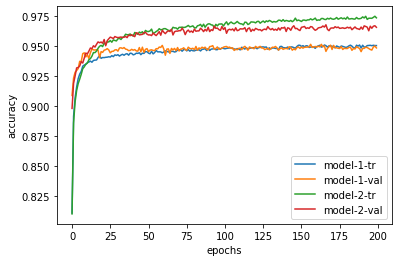

In [49]:
plt.plot(history_1.history['binary_accuracy'], label = 'model-1-tr')
plt.plot(history_1.history['val_binary_accuracy'], label = 'model-1-val')
plt.plot(history_2.history['binary_accuracy'], label = 'model-2-tr')
plt.plot(history_2.history['val_binary_accuracy'], label = 'model-2-val')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()